In [3]:
import numpy as np
import scipy.sparse.linalg as LA
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import sys
import datetime
sys.path.append('../')
%load_ext autoreload
%autoreload 2
from utils import *

# We study the dissociation

In [4]:
# parameters
Lx, Ly, eps, p = 101, 51, 0.5, 1.1
ax, ay = (Lx-1)*eps/2, (Ly-1)*eps/2 #size of the box
xx, yy = np.linspace(-ax, ax, Lx), np.linspace(-ay, ay, Ly)

In [5]:
# First rho0
xgrid, ygrid = np.meshgrid(xx, yy)
def f_exp(x,y): return np.exp(-(x**2 + y**2)/20)
rho0 = f_exp(xgrid, ygrid)
rho0 /= integral(rho0, eps)

rho1, I1 = find_best_gamma(rho0, 1, p, eps, tol=1e-7, Niter=30)

Find best gamma with the following parameters:
nelec =  1
p =  1.1
Lx, Ly, eps, scale =  101 51 0.5 1
tol, Niter =  1e-07 30

Iteration  0
	Energy =  -0.4967025358679247
	kinetic =  0.0519346684031722 potential =  -0.5486372042710969
	Viriel =  -0.002929052023937534

Iteration  1
	Energy =  -0.49675304274305754
	kinetic =  0.05315699544097405 potential =  -0.5499100381840316
	Viriel =  -0.0018340083774291624

Iteration  2
	Energy =  -0.4967644332401776
	kinetic =  0.0538126723424228 potential =  -0.5505771055826004
	Viriel =  -0.0012450382158372963

Iteration  3
	Energy =  -0.49676725366776336
	kinetic =  0.054152293738608026 potential =  -0.5509195474063714
	Viriel =  -0.0009396610020291629

Iteration  4
	Energy =  -0.49676796799690737
	kinetic =  0.05432587493095996 potential =  -0.5510938429278673
	Viriel =  -0.0007835093618268271

Iteration  5
	Energy =  -0.49676815006308184
	kinetic =  0.05441410934289678 potential =  -0.5511822594059786
	Viriel =  -0.0007041165977011293

Iteratio

energy = -0.496768


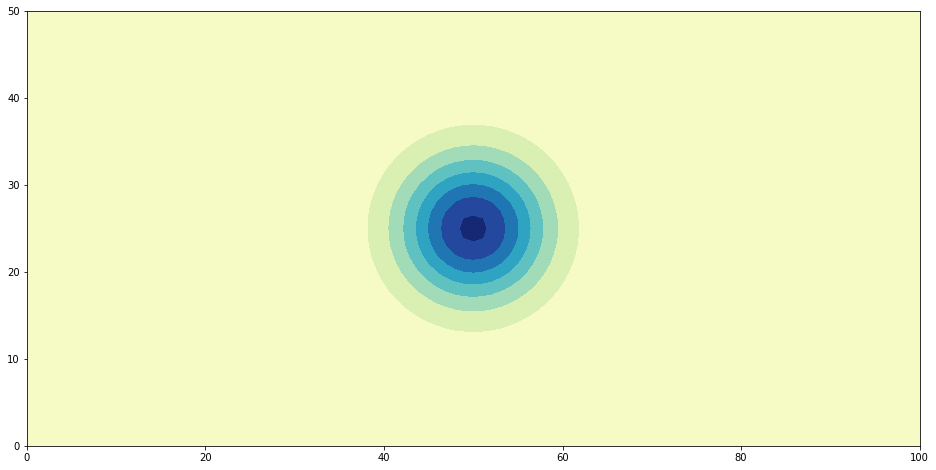

In [23]:
print("energy = %f"%I1)
plt.figure(figsize=(16,8))
plt.contourf(rho1, cmap = 'YlGnBu')

## Test with scale parameters

In [24]:
Lx, Ly, eps, p = 101, 51, 0.5, 1.1
s = 2-p

rho1_s, I1_s = find_best_gamma(rho0, 1, p, eps, scale = s, tol=1e-8, Niter=30)

Find best gamma with the following parameters:
nelec =  1
p =  1.1
Lx, Ly, eps, scale =  101 51 0.5 0.8999999999999999
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.4961032901068395
	kinetic =  0.04688137871526212 potential =  -0.5429846688221016
	Viriel =  -0.0074170881669480895

Iteration  1
	Energy =  -0.49655276507522966
	kinetic =  0.05080864285138648 potential =  -0.5473614079266161
	Viriel =  -0.003927497941275178

Iteration  2
	Energy =  -0.49667125011118646
	kinetic =  0.05293611644740851 potential =  -0.549607366558595
	Viriel =  -0.002024620208451039

Iteration  3
	Energy =  -0.49670141818921265
	kinetic =  0.05403632832551974 potential =  -0.5507377465147324
	Viriel =  -0.0010374463259535532

Iteration  4
	Energy =  -0.4967089685740459
	kinetic =  0.05459325006462237 potential =  -0.5513022186386682
	Viriel =  -0.0005369717992445011

Iteration  5
	Energy =  -0.49671084250650555
	kinetic =  0.054872277253653484 potential =  -0.5515831197601591
	Viriel =  -0.000286034722

energy = -0.496711


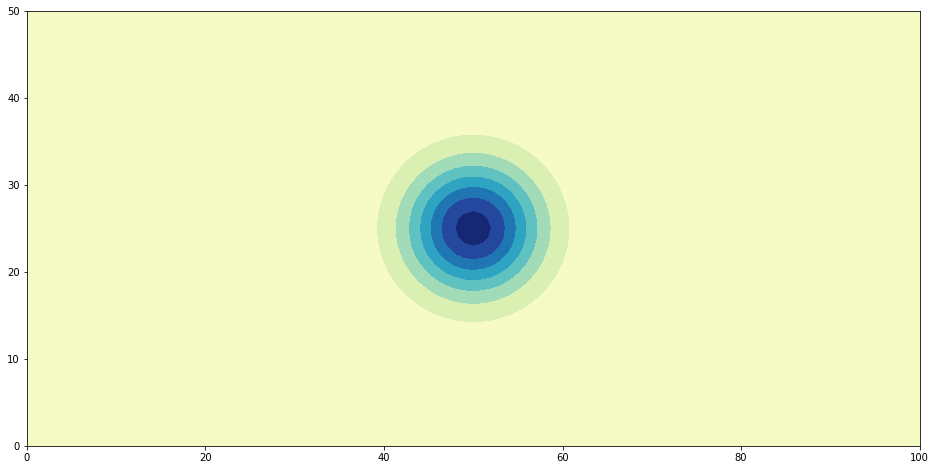

In [26]:
print("energy = %f"%I1_s)
plt.figure(figsize=(16,8))
plt.contourf(rho1_s, cmap = 'YlGnBu')

In [27]:
print("must be equal : ", I1_s - I1)

must be equal :  5.6741543309146714e-05


# Study of the scaling

In [53]:
prange = np.linspace(1.1, 1.4, 10)

rho_record = []
energy_record = []

rho0 = rho1 #initialisation
for p in prange:
    rho, I = find_best_gamma(rho0, 1, p, eps, scale = 1, tol=1e-8, Niter=30)
    rho_record.append(rho)
    energy_record.append(I)

Find best gamma with the following parameters:
nelec =  1
p =  1.1
Lx, Ly, eps, scale =  101 51 0.5 1
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.4967682085239672
	kinetic =  0.05448154329192491 potential =  -0.5512497518158921
	Viriel =  -0.000643431889664349

Iteration  1
	Energy =  -0.4967682115844964
	kinetic =  0.0544930377581921 potential =  -0.5512612493426885
	Viriel =  -0.0006330871760767964
Find best gamma with the following parameters:
nelec =  1
p =  1.1333333333333333
Lx, Ly, eps, scale =  101 51 0.5 1
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.39955661572561096
	kinetic =  0.05763844407480977 potential =  -0.45719505980042074
	Viriel =  -0.003320897231912978

Iteration  1
	Energy =  -0.39962037356274355
	kinetic =  0.05934378852863946 potential =  -0.458964162091383
	Viriel =  -0.0018514330835449275

Iteration  2
	Energy =  -0.399636832522071
	kinetic =  0.06022576117378963 potential =  -0.45986259369586063
	Viriel =  -0.00108925131899177

Iteration  3
	Ene


Iteration  5
	Energy =  -0.12180579822891935
	kinetic =  0.050497056193858504 potential =  -0.17230285442277785
	Viriel =  -0.0011938001329748552

Iteration  6
	Energy =  -0.12180581619195284
	kinetic =  0.0504677629090486 potential =  -0.17227357910100144
	Viriel =  -0.0012143108212518405

Iteration  7
	Energy =  -0.12180582150878354
	kinetic =  0.05045185210416954 potential =  -0.17225767361295308
	Viriel =  -0.0012254499797163948
Find best gamma with the following parameters:
nelec =  1
p =  1.3333333333333333
Lx, Ly, eps, scale =  101 51 0.5 1
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.0925590298591098
	kinetic =  0.048686052166869026 potential =  -0.14124508202597882
	Viriel =  0.0016043581582094318

Iteration  1
	Energy =  -0.0926826525421938
	kinetic =  0.04615685103911352 potential =  -0.1388395035813073
	Viriel =  -0.0001229834879889133

Iteration  2
	Energy =  -0.09271600426314469
	kinetic =  0.04487174347701652 potential =  -0.13758774774016122
	Viriel =  -0.0009908

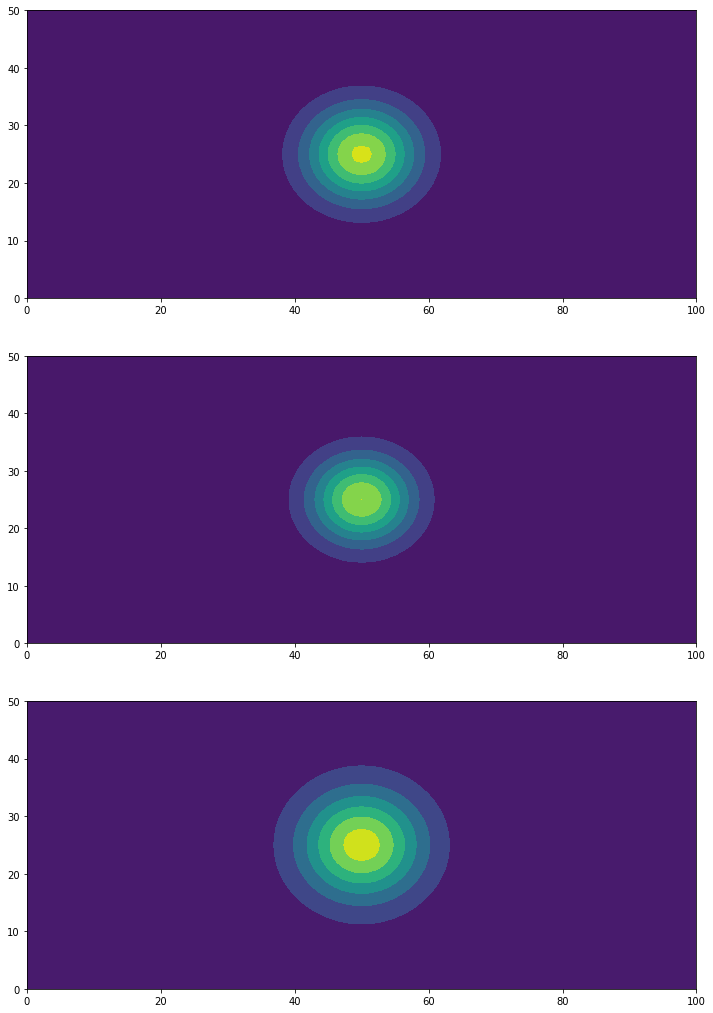

In [58]:
plt.figure(figsize = (12, 18))
plt.subplot(311)
plt.contourf(rho_record[0])
plt.subplot(312)
plt.contourf(rho_record[4])
plt.subplot(313)
plt.contourf(rho_record[8])

In [55]:
for rho in rho_record:
    print(np.sum(rho)*eps**2)

0.9999999999999979
1.0000000000000009
0.9999999999999977
1.0000000000000047
0.9999999999999933
0.9999999999999976
1.0000000000000004
1.000000000000004
1.0000000000000024
1.0000000000000022


In [56]:
plt.figure(figsize = (6, 6))
width = []
for rho in rho_record:
    print( np.sum(abs(xgrid)*rho)/len(rho) )
    print( np.sum(abs(ygrid)*rho)/len(rho) )
    width.append(np.sum(abs(xgrid)*rho)/len(rho))

0.1870783729318662
0.18895664738710033
0.17699759738843018
0.17796750701765462
0.17325735303348277
0.17408602084190344
0.1735859126412363
0.17455727409307578
0.17708844421385536
0.17848312184463447
0.1835166253707835
0.1858039353230552
0.19298615386705553
0.19706622891261955
0.20626577294510337
0.2140831485260122
0.2247508650221632
0.2406284783066725
0.2518471057842881
0.2872221932512742


<Figure size 432x432 with 0 Axes>

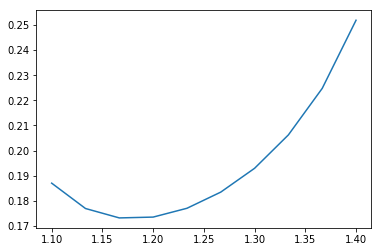

In [57]:
plt.plot(prange, width)

# idem in other regime

In [97]:
prange = np.linspace(1.3, 1.7, 10)
s = 1/8
rho_record = []
energy_record = []

rho0 = rho1 #initialisation
for p in prange:
    rho, I = find_best_gamma(rho0, 1, p, eps, scale = s, tol=1e-8, Niter=30)
    rho_record.append(rho)
    energy_record.append(I)

Find best gamma with the following parameters:
nelec =  1
p =  1.3
Lx, Ly, eps, scale =  101 51 0.5 0.125
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.07914079334370568
	kinetic =  0.004573899179445302 potential =  -0.08371469252315097
	Viriel =  -0.020540508577499995

Iteration  1
	Energy =  -0.10190042409614984
	kinetic =  0.012794686393986813 potential =  -0.11469511049013666
	Viriel =  -0.021613846753054188

Iteration  2
	Energy =  -0.11600077064915545
	kinetic =  0.024286265631470294 potential =  -0.14028703628062575
	Viriel =  -0.01779984525271744

Iteration  3
	Energy =  -0.1237454894838171
	kinetic =  0.03643947296478968 potential =  -0.16018496244860678
	Viriel =  -0.011616015769792362

Iteration  4
	Energy =  -0.1284551239309874
	kinetic =  0.04833199180335422 potential =  -0.1767871157343416
	Viriel =  -0.004704142916948269

Iteration  5
	Energy =  -0.13200224172679412
	kinetic =  0.06071691317780867 potential =  -0.19271915490460279
	Viriel =  0.0029011667064278227

I


Iteration  1
	Energy =  -0.044310842454518634
	kinetic =  0.008640176653867003 potential =  -0.052951019108385636
	Viriel =  -0.011951886332727408

Iteration  2
	Energy =  -0.05159457821911799
	kinetic =  0.01565827427774599 potential =  -0.06725285249686398
	Viriel =  -0.010495612804367779

Iteration  3
	Energy =  -0.05577153905792856
	kinetic =  0.02303483915218978 potential =  -0.07880637821011834
	Viriel =  -0.007612085707300681

Iteration  4
	Energy =  -0.058007638618613994
	kinetic =  0.02968547854036403 potential =  -0.08769311715897803
	Viriel =  -0.004417400354794088

Iteration  5
	Energy =  -0.05927020186209759
	kinetic =  0.03538594839865584 potential =  -0.09465615026075343
	Viriel =  -0.001424776702748265

Iteration  6
	Energy =  -0.06007214955551801
	kinetic =  0.040382826947422415 potential =  -0.10045497650294043
	Viriel =  0.0013170027518344743

Iteration  7
	Energy =  -0.0606265812913552
	kinetic =  0.04490837641962031 potential =  -0.10553495771097551
	Viriel =  0.0


Iteration  28
	Energy =  -0.03816392228660275
	kinetic =  0.03979090168746526 potential =  -0.07795482397406801
	Viriel =  0.006010477965369125

Iteration  29
	Energy =  -0.03816392849201997
	kinetic =  0.03980650675335424 potential =  -0.07797043524537421
	Viriel =  0.006019318147025415
Did not converge after  30  iterations?
Find best gamma with the following parameters:
nelec =  1
p =  1.4777777777777779
Lx, Ly, eps, scale =  101 51 0.5 0.125
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.012774598837287222
	kinetic =  0.0025023625107302785 potential =  -0.0152769613480175
	Viriel =  -0.004796630133322529

Iteration  1
	Energy =  -0.016618929014047303
	kinetic =  0.005243739095523827 potential =  -0.021862668109571128
	Viriel =  -0.005201757890160157

Iteration  2
	Energy =  -0.019289873335521658
	kinetic =  0.008677399823265005 potential =  -0.027967273158786665
	Viriel =  -0.004684741797044182

Iteration  3
	Energy =  -0.02087798118060381
	kinetic =  0.012165747496719271 pote


Iteration  0
	Energy =  -0.004116681544189778
	kinetic =  0.0016907121438308568 potential =  -0.0058073936880206345
	Viriel =  -0.001600144279380836

Iteration  1
	Energy =  -0.0049599331671794835
	kinetic =  0.0028034000579883287 potential =  -0.007763333225167812
	Viriel =  -0.0015958221029400985

Iteration  2
	Energy =  -0.005529029742044874
	kinetic =  0.004010108073283217 potential =  -0.009539137815328091
	Viriel =  -0.0013954033554027011

Iteration  3
	Energy =  -0.005867838953806123
	kinetic =  0.005141002085515841 potential =  -0.011008841039321964
	Viriel =  -0.0010973411700999384

Iteration  4
	Energy =  -0.006051478371167013
	kinetic =  0.006093009352049377 potential =  -0.01214448772321639
	Viriel =  -0.0007888670244399106

Iteration  5
	Energy =  -0.006144391845446101
	kinetic =  0.0068348077675112855 potential =  -0.012979199612957387
	Viriel =  -0.0005200720131645666

Iteration  6
	Energy =  -0.0061891376621104575
	kinetic =  0.0073821418840189605 potential =  -0.01357


Iteration  8
	Energy =  -0.0010162044058469677
	kinetic =  0.0018853811282238111 potential =  -0.002901585534070779
	Viriel =  -1.6769388555921408e-05

Iteration  9
	Energy =  -0.0010164600132837414
	kinetic =  0.001907777588794867 potential =  -0.0029242376020786084
	Viriel =  -9.222617012220316e-06

Iteration  10
	Energy =  -0.0010165849946639268
	kinetic =  0.0019235347771657083 potential =  -0.002940119771829635
	Viriel =  -3.8770732559410305e-06

Iteration  11
	Energy =  -0.0010166458665830012
	kinetic =  0.0019345786302633027 potential =  -0.002951224496846304
	Viriel =  -1.1298433594069367e-07

Iteration  12
	Energy =  -0.001016675433154062
	kinetic =  0.0019422984091895337 potential =  -0.0029589738423435956
	Viriel =  2.5266680976213703e-06

Iteration  13
	Energy =  -0.0010166897667964916
	kinetic =  0.001947684600926799 potential =  -0.0029643743677232907
	Viriel =  4.372515419308895e-06

Iteration  14
	Energy =  -0.00101669670640712
	kinetic =  0.0019514377551647687 potenti

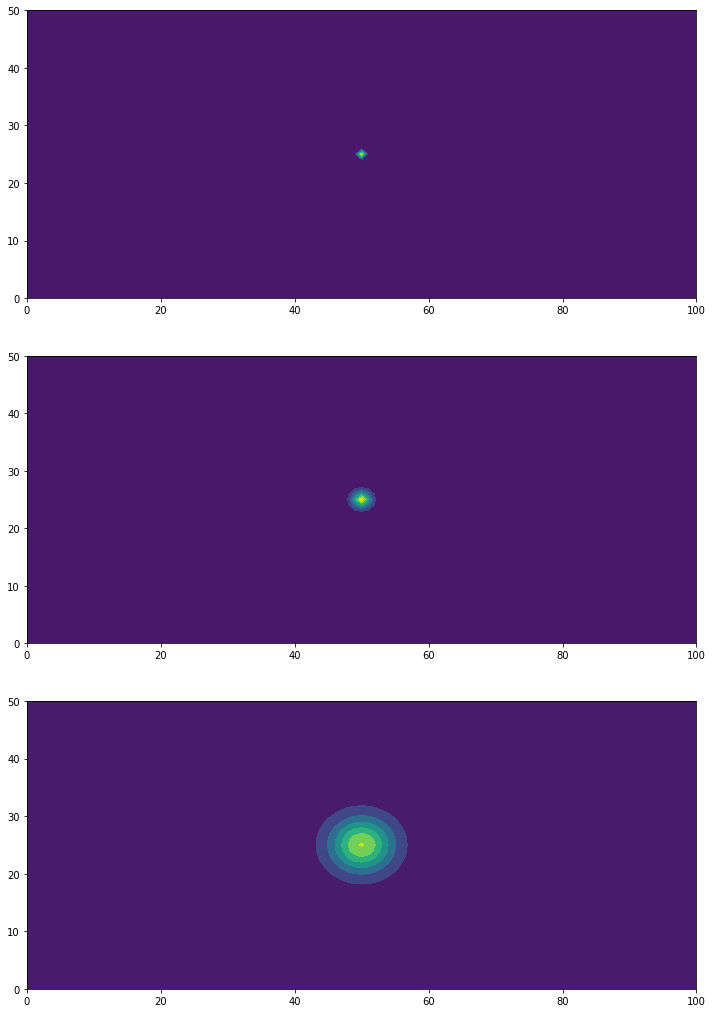

In [98]:
plt.figure(figsize = (12, 18))
plt.subplot(311)
plt.contourf(rho_record[0])
plt.subplot(312)
plt.contourf(rho_record[4])
plt.subplot(313)
plt.contourf(rho_record[8])

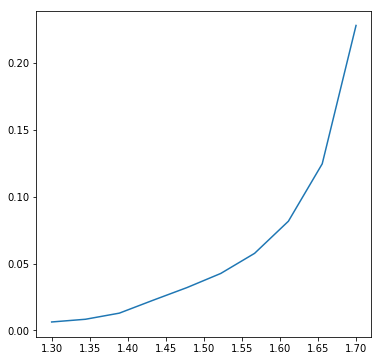

In [141]:
plt.figure(figsize = (6, 6))
width = []
for rho in rho_record:
    width.append(np.sum(abs(xgrid)*rho)/len(rho))
plt.plot(prange, width)

# Study of the dissociation
From the previous study, we see that if the scale parameters s increases, the answer will be diluted: the solution lives at scale s.

# p = 1.5

In [6]:
p = 1.5
s = (2-p)**2
nelec = 1
# first we perform a computation for a single electron
rho1, I1 = find_best_gamma(rho0, nelec, p, eps, scale = s, tol=1e-8, Niter=30)

Find best gamma with the following parameters:
nelec =  1
p =  1.5
Lx, Ly, eps, scale =  101 51 0.5 0.25
tol, Niter =  1e-08 30

Iteration  0
	Energy =  -0.013222362329597526
	kinetic =  0.005389402388227238 potential =  -0.018611764717824764
	Viriel =  -0.003916479970685144

Iteration  1
	Energy =  -0.014759553928577546
	kinetic =  0.008061535989834723 potential =  -0.02282108991841227
	Viriel =  -0.003349008969371412

Iteration  2
	Energy =  -0.015596544570524305
	kinetic =  0.01053499852268875 potential =  -0.026131543093213055
	Viriel =  -0.0025307730239177775

Iteration  3
	Energy =  -0.015997758227715504
	kinetic =  0.012517802104793835 potential =  -0.02851556033250934
	Viriel =  -0.0017399780614608343

Iteration  4
	Energy =  -0.01617363839634326
	kinetic =  0.013958882713132415 potential =  -0.030132521109475674
	Viriel =  -0.0011073778416054222

Iteration  5
	Energy =  -0.01624611366491815
	kinetic =  0.014939527199124274 potential =  -0.031185640864042425
	Viriel =  -0.00065

In [10]:
width1 = np.sum(abs(xgrid)*rho1)/len(rho1)/s
print("Size of a single electron = ", width1)

dist_0 = int(20*width1/eps)
print("initial distance = ", dist_0)
rho2_0 = np.roll(rho1, -dist_0//2, axis = 1) + np.roll(rho1, dist_0//2, axis = 1)

nelec = 2
# first we perform a computation for a single electron
rho2, I2 = find_best_gamma(rho2_0, nelec, p, eps, scale = s, tol=1e-8, Niter=100)

Size of a single electron =  0.33735372081481174
initial distance =  13
Find best gamma with the following parameters:
nelec =  2
p =  1.5
Lx, Ly, eps, scale =  101 51 0.5 0.25
tol, Niter =  1e-08 100

Iteration  0
	Energy =  -0.03279999910094941
	kinetic =  0.03321671341975392 potential =  -0.06601671252070333
	Viriel =  0.00020835715940225458

Iteration  1
	Energy =  -0.03280737457184764
	kinetic =  0.0330073092579906 potential =  -0.06581468382983824
	Viriel =  9.996734307148036e-05

Iteration  2
	Energy =  -0.032812236991538776
	kinetic =  0.03287091077982225 potential =  -0.06568314777136103
	Viriel =  2.933689414173768e-05

Iteration  3
	Energy =  -0.03281644899360188
	kinetic =  0.032784441982136286 potential =  -0.06560089097573817
	Viriel =  -1.6003505732796464e-05

Iteration  4
	Energy =  -0.03282045382691626
	kinetic =  0.032731385160041135 potential =  -0.06555183898695739
	Viriel =  -4.4534333437561135e-05

Iteration  5
	Energy =  -0.032824385499989575
	kinetic =  0.032700


Iteration  55
	Energy =  -0.032919810307477204
	kinetic =  0.033418873653140266 potential =  -0.06633868396061747
	Viriel =  0.0002495316728315308

Iteration  56
	Energy =  -0.03291995911832257
	kinetic =  0.03342776553790665 potential =  -0.06634772465622922
	Viriel =  0.0002539032097920377

Iteration  57
	Energy =  -0.03292009128198889
	kinetic =  0.033436200408097236 potential =  -0.06635629169008612
	Viriel =  0.00025805456305417335

Iteration  58
	Energy =  -0.03292020853995592
	kinetic =  0.03344419442104472 potential =  -0.06636440296100064
	Viriel =  0.00026199294054440186

Iteration  59
	Energy =  -0.032920312472042926
	kinetic =  0.033451764061623854 potential =  -0.06637207653366678
	Viriel =  0.000265725794790464

Iteration  60
	Energy =  -0.0329204045079184
	kinetic =  0.03345892600270543 potential =  -0.06637933051062384
	Viriel =  0.00026926074739351546

Iteration  61
	Energy =  -0.03292048593840918
	kinetic =  0.03346569698113895 potential =  -0.06638618291954813
	Viri

distance between electrons =  11
I1 =  -0.01629242819456098
I2 =  -0.03292108252898997
Energy gain =  -0.00033622613986800803
that is (in percent) 0.02063695698718825


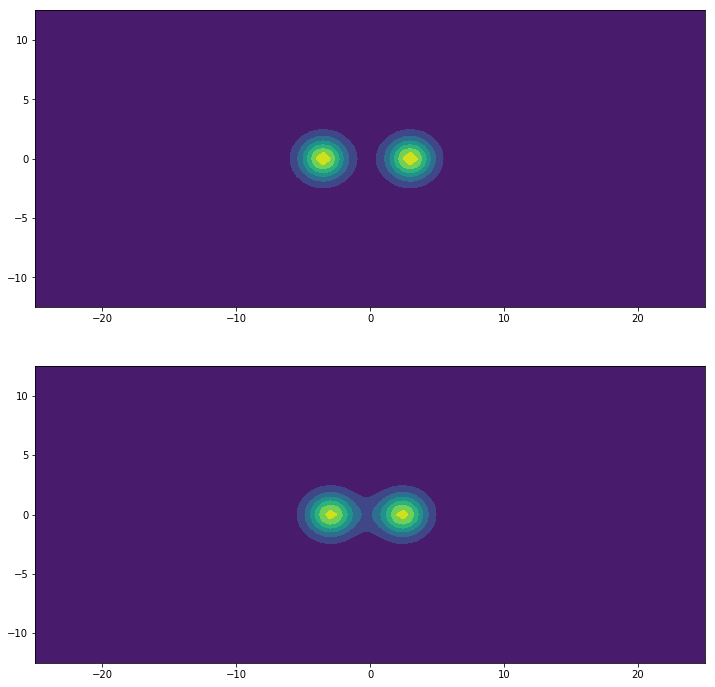

In [11]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.contourf(xx,yy,rho2_0)
plt.subplot(212)
plt.contourf(xx,yy,rho2)

maxima = find_maxima(rho2)
print("distance between electrons = ", maxima[1][1] - maxima[1][0])

print("I1 = ", I1)
print("I2 = ", I2)
print("Energy gain = ", I2 - 2*I1)
print("that is (in percent)", (I2-2*I1)/I1)

# p = 1.6

In [12]:
p = 1.6
s = 0.15
nelec = 1
# first we perform a computation for a single electron
rho1, I1 = find_best_gamma(rho0, nelec, p, eps, scale = s, tol=1e-8, Niter=40)

Find best gamma with the following parameters:
nelec =  1
p =  1.6
Lx, Ly, eps, scale =  101 51 0.5 0.15
tol, Niter =  1e-08 40

Iteration  0
	Energy =  -0.002656879659522964
	kinetic =  0.0016882460435703617 potential =  -0.004345125703093326
	Viriel =  -0.0009188293782856341

Iteration  1
	Energy =  -0.0029743621473121533
	kinetic =  0.0023847450326195275 potential =  -0.005359107179931681
	Viriel =  -0.0008307192753394814

Iteration  2
	Energy =  -0.0031729809829736167
	kinetic =  0.003056021624768181 potential =  -0.006229002607741798
	Viriel =  -0.0006813799398768983

Iteration  3
	Energy =  -0.0032848218251749143
	kinetic =  0.0036326941547762718 potential =  -0.006917515979951186
	Viriel =  -0.0005178154331944404

Iteration  4
	Energy =  -0.003343294296988696
	kinetic =  0.004090332216229419 potential =  -0.007433626513218115
	Viriel =  -0.00036984369170145037

Iteration  5
	Energy =  -0.0033722691449782445
	kinetic =  0.004433602860824799 potential =  -0.007805872005803043
	Vir

(-25.0, 25.0, -12.5, 12.5)

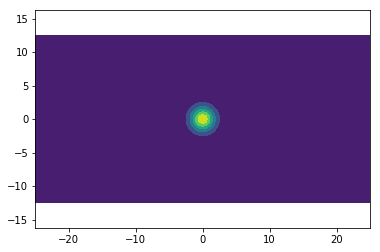

In [13]:
plt.contourf(xx,yy,rho1)
plt.axis('equal')

In [17]:
width1 = np.sum(abs(xgrid)*rho1)/len(rho1)/s
print("Size of a single electron = ", width1)

dist_0 = int(10*width1/eps)
print("initial distance = ", dist_0)
rho2_0 = np.roll(rho1, -dist_0//2, axis = 1) + np.roll(rho1, dist_0//2, axis = 1)

nelec = 2
# first we perform a computation for a single electron
rho2, I2 = find_best_gamma(rho2_0, nelec, p, eps, scale = s, tol=1e-8, Niter=100)

Size of a single electron =  0.6062074599881955
initial distance =  12
Find best gamma with the following parameters:
nelec =  2
p =  1.6
Lx, Ly, eps, scale =  101 51 0.5 0.15
tol, Niter =  1e-08 100

Iteration  0
	Energy =  -0.006843442433635969
	kinetic =  0.010675549903890458 potential =  -0.017518992337526428
	Viriel =  0.00016415450137460125

Iteration  1
	Energy =  -0.006844436141755533
	kinetic =  0.010635791504841653 potential =  -0.017480227646597186
	Viriel =  0.00014765491688334062

Iteration  2
	Energy =  -0.006844704640560065
	kinetic =  0.0106039636647962 potential =  -0.017448668305356265
	Viriel =  0.00013476268158243987

Iteration  3
	Energy =  -0.006844804411762327
	kinetic =  0.010580323777771903 potential =  -0.01742512818953423
	Viriel =  0.00012524686405136418

Iteration  4
	Energy =  -0.006844849636988495
	kinetic =  0.01056327862091322 potential =  -0.017408128257901716
	Viriel =  0.00011840166617218921

Iteration  5
	Energy =  -0.006844873368467435
	kinetic =  


Iteration  55
	Energy =  -0.006844982761866632
	kinetic =  0.010507153157279889 potential =  -0.01735213591914652
	Viriel =  9.587160579197472e-05


distance between electrons =  12
I1 =  -0.0033977959715007994
I2 =  -0.006844982761866632
Energy gain =  -4.939081886503292e-05
that is (in percent) 0.014536134388086023


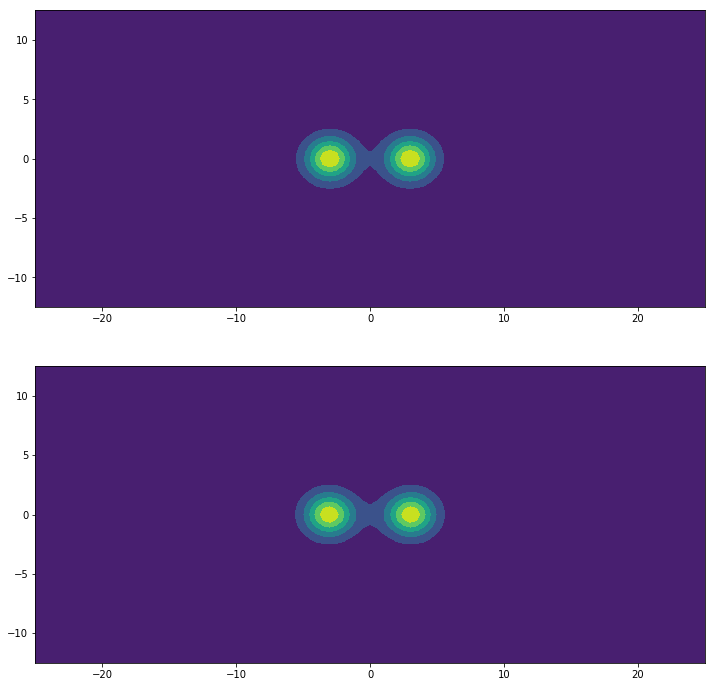

In [19]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.contourf(xx,yy,rho2_0)
plt.subplot(212)
plt.contourf(xx,yy,rho2)

maxima = find_maxima(rho2)
print("distance between electrons = ", maxima[1][1] - maxima[1][0])

print("I1 = ", I1)
print("I2 = ", I2)
print("Energy gain = ", I2 - 2*I1)
print("that is (in percent)", (I2-2*I1)/I1)

# p = 1.7

In [36]:
p = 1.7
s = 0.1
nelec = 1
# first we perform a computation for a single electron
rho1, I1 = find_best_gamma(rho0, nelec, p, eps, scale = s, tol=1e-8, Niter=40)

Find best gamma with the following parameters:
nelec =  1
p =  1.7
Lx, Ly, eps, scale =  101 51 0.5 0.1
tol, Niter =  1e-08 40

Iteration  0
	Energy =  -0.0002866079673144745
	kinetic =  0.00048547199310961295 potential =  -0.0007720799604240874
	Viriel =  -5.498397918724825e-05

Iteration  1
	Energy =  -0.0002900047684220677
	kinetic =  0.000518045458801133 potential =  -0.0008080502272232007
	Viriel =  -4.758970025510749e-05

Iteration  2
	Energy =  -0.0002918538016069656
	kinetic =  0.0005496807886214359 potential =  -0.0008415345902284015
	Viriel =  -3.939342453844507e-05

Iteration  3
	Energy =  -0.0002929617556844057
	kinetic =  0.0005758601768479614 potential =  -0.0008688219325323671
	Viriel =  -3.2315175924695484e-05

Iteration  4
	Energy =  -0.00029361414329663756
	kinetic =  0.0005965554330473577 potential =  -0.0008901695763439952
	Viriel =  -2.656327039343893e-05

Iteration  5
	Energy =  -0.0002939914184922957
	kinetic =  0.0006125781570345958 potential =  -0.0009065695755

(-25.0, 25.0, -12.5, 12.5)

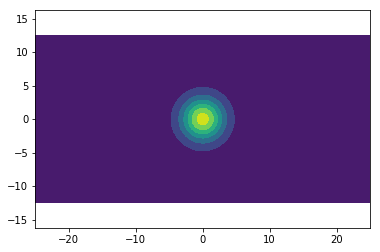

In [37]:
plt.contourf(xx,yy,rho1)
plt.axis('equal')

In [40]:
width1 = np.sum(abs(xgrid)*rho1)/len(rho1)/s
print("Size of a single electron = ", width1)

dist_0 = 10
print("initial distance = ", dist_0)
rho2_0 = np.roll(rho1, -dist_0//2, axis = 1) + np.roll(rho1, dist_0//2, axis = 1)

nelec = 2
# first we perform a computation for a single electron
rho2, I2 = find_best_gamma(rho2_0, nelec, p, eps, scale = s, tol=1e-8, Niter=100)

Size of a single electron =  1.7200518882481333
initial distance =  10
Find best gamma with the following parameters:
nelec =  2
p =  1.7
Lx, Ly, eps, scale =  101 51 0.5 0.1
tol, Niter =  1e-08 100

Iteration  0
	Energy =  -0.0004873712399631584
	kinetic =  0.0017462744660205387 potential =  -0.002233645705983697
	Viriel =  0.00018272247183195086

Iteration  1
	Energy =  -0.0005258559027140285
	kinetic =  0.0016291252567142873 potential =  -0.002154981159428316
	Viriel =  0.00012063844511446629

Iteration  2
	Energy =  -0.000544523477400566
	kinetic =  0.0015667676191112546 potential =  -0.0021112910965118206
	Viriel =  8.886385155298026e-05

Iteration  3
	Energy =  -0.0005560482698040317
	kinetic =  0.0015281929026354122 potential =  -0.002084241172439444
	Viriel =  6.922408192780146e-05

Iteration  4
	Energy =  -0.0005637499532986012
	kinetic =  0.0015027460874800034 potential =  -0.0020664960407786046
	Viriel =  5.619885893498036e-05

Iteration  5
	Energy =  -0.0005691256268707536



Iteration  53
	Energy =  -0.0005900825587818869
	kinetic =  0.0013533501324143255 potential =  -0.0019434326911962124
	Viriel =  -7.052751423022993e-06

Iteration  54
	Energy =  -0.000590105351625247
	kinetic =  0.0013528197088089472 potential =  -0.0019429250604341942
	Viriel =  -7.227833494988581e-06

Iteration  55
	Energy =  -0.0005901270000549367
	kinetic =  0.0013523082529284006 potential =  -0.0019424352529833374
	Viriel =  -7.396424159935482e-06

Iteration  56
	Energy =  -0.000590147576675753
	kinetic =  0.0013518147986694646 potential =  -0.0019419623753452176
	Viriel =  -7.558864072187673e-06

Iteration  57
	Energy =  -0.0005901671484582021
	kinetic =  0.00135133844360441 potential =  -0.001941505592062612
	Viriel =  -7.715470839418388e-06

Iteration  58
	Energy =  -0.0005901857772563821
	kinetic =  0.001350878343896136 potential =  -0.001941064121152518
	Viriel =  -7.866540910626656e-06

Iteration  59
	Energy =  -0.0005902035202708766
	kinetic =  0.0013504337096826415 potent

distance between electrons =  24
I1 =  -0.0002944817554291385
I2 =  -0.000590536576475398
Energy gain =  -1.5730656171210507e-06
that is (in percent) 0.005341810105786263


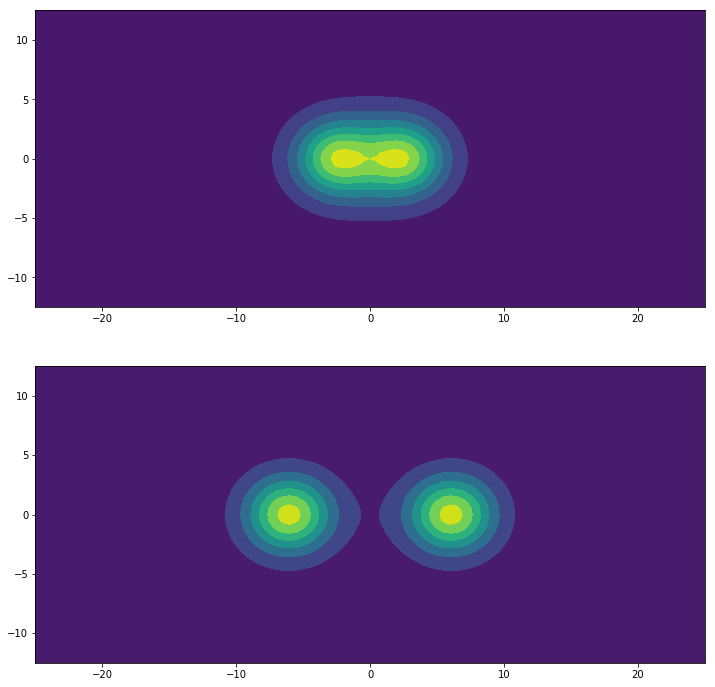

In [41]:
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.contourf(xx,yy,rho2_0)
plt.subplot(212)
plt.contourf(xx,yy,rho2)

maxima = find_maxima(rho2)
print("distance between electrons = ", maxima[1][1] - maxima[1][0])

print("I1 = ", I1)
print("I2 = ", I2)
print("Energy gain = ", I2 - 2*I1)
print("that is (in percent)", (I2-2*I1)/I1)

# Old stuff

In [110]:
# parameters for a long box
Lx, Ly, eps, p, nelec = 101, 51, 0.3, 1.3, 2
ax, ay = (Lx-1)*eps/2, (Ly-1)*eps/2 #size of the box
xx, yy = np.linspace(-ax, ax, Lx), np.linspace(-ay, ay, Ly)

In [115]:
# First rho0
shift=10
rho0_p13 = np.roll(rho1_s, -shift//2, axis=1) + np.roll(rho1_s, shift//2, axis=1)
s = (2-p)**4

rho2_p13, I2_p13 = find_best_gamma(rho0_p13, nelec, p, eps, scale = s, tol=1e-7, Niter=30)

Find best gamma with the following parameters:
nelec =  2
p =  1.3
Lx, Ly, eps, scale =  101 51 0.3 0.24009999999999995
tol, Niter =  1e-07 30

Iteration  0
	Energy =  -0.22449486441657093
	kinetic =  0.044967719728148135 potential =  -0.2694625841447191
	Viriel =  -0.0358710555152676

Iteration  1
	Energy =  -0.23794207589249766
	kinetic =  0.06324895689740624 potential =  -0.3011910327899039
	Viriel =  -0.027108352939564942

Iteration  2
	Energy =  -0.24332737997262277
	kinetic =  0.07781659000480966 potential =  -0.32114396997743244
	Viriel =  -0.018526600988420086

Iteration  3
	Energy =  -0.24537412870087327
	kinetic =  0.08806136200374526 potential =  -0.33343549070461853
	Viriel =  -0.011969285207640318

Iteration  4
	Energy =  -0.24613654929680165
	kinetic =  0.09470986633961845 potential =  -0.3408464156364201
	Viriel =  -0.0075440583513076

Iteration  5
	Energy =  -0.24642926496485157
	kinetic =  0.09884025271794948 potential =  -0.34526951768280106
	Viriel =  -0.004740602586

For p = 1.800000, energy = -0.246787
dist =  10


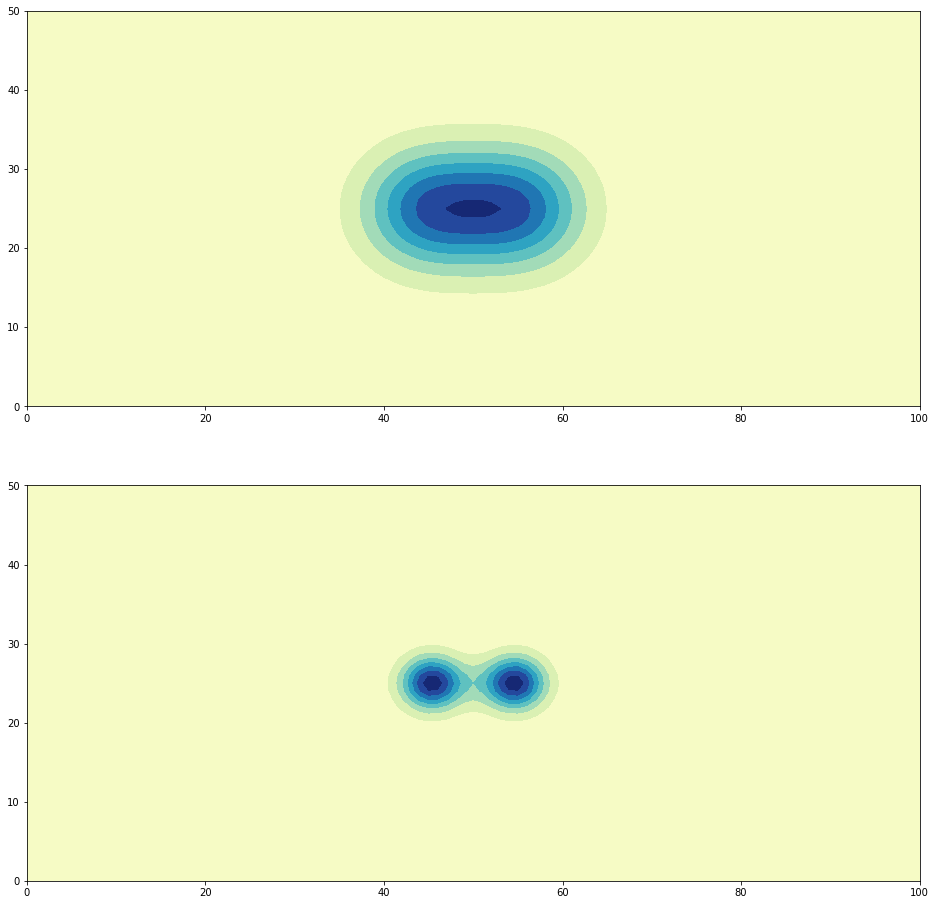

In [168]:
print("For p = %f, energy = %f"%(p, I2_p13))

maxima = find_maxima(rho2_p13)
print("dist = ", maxima[1][1] - maxima[1][0])

plt.figure(figsize=(16,16))
plt.subplot(211)
plt.contourf(rho0_p13, cmap = 'YlGnBu')
plt.subplot(212)
plt.contourf(rho2_p13, cmap = 'YlGnBu')

# We increase p

In [127]:
p = 1.4
s = (2-p)**4
rho2_p14, I2_p14 = find_best_gamma(rho2_p13, nelec, p, eps, scale = s, tol=1e-7, Niter=200)

Find best gamma with the following parameters:
nelec =  2
p =  1.4
Lx, Ly, eps, scale =  101 51 0.3 0.12960000000000008
tol, Niter =  1e-07 200

Iteration  0
	Energy =  -0.09826912116553269
	kinetic =  0.041934242459335525 potential =  -0.1402033636248682
	Viriel =  -0.014147102990611747

Iteration  1
	Energy =  -0.10058177160544178
	kinetic =  0.05050292796009849 potential =  -0.15108469956554027
	Viriel =  -0.009930951866117602

Iteration  2
	Energy =  -0.1016464780876698
	kinetic =  0.05696418969172402 potential =  -0.1586106677793938
	Viriel =  -0.006480077420033488

Iteration  3
	Energy =  -0.10211231167098689
	kinetic =  0.06152021664971811 potential =  -0.163632528320705
	Viriel =  -0.003932794678563868

Iteration  4
	Energy =  -0.10230931805977225
	kinetic =  0.06456351153120282 potential =  -0.16687282959097507
	Viriel =  -0.002185620305187194

Iteration  5
	Energy =  -0.1023935833759706
	kinetic =  0.06651878692849442 potential =  -0.16891237030446501
	Viriel =  -0.0010461611


Iteration  56
	Energy =  -0.10310277360386413
	kinetic =  0.07134175465364984 potential =  -0.17444452825751397
	Viriel =  0.0015639433506442618

Iteration  57
	Energy =  -0.10310469559344258
	kinetic =  0.07139323729985679 potential =  -0.17449793289329937
	Viriel =  0.0015940641425370577

Iteration  58
	Energy =  -0.10310634215959151
	kinetic =  0.07144168290649146 potential =  -0.17454802506608297
	Viriel =  0.00162247288005829

Iteration  59
	Energy =  -0.10310774829427656
	kinetic =  0.07148713527389465 potential =  -0.1745948835681712
	Viriel =  0.0016491818466261854

Iteration  60
	Energy =  -0.1031089455531287
	kinetic =  0.07152966178327104 potential =  -0.17463860733639974
	Viriel =  0.001674218848711162

Iteration  61
	Energy =  -0.10310996215915536
	kinetic =  0.07156934912573693 potential =  -0.17467931128489228
	Viriel =  0.0016976246117800242

Iteration  62
	Energy =  -0.10311082316649567
	kinetic =  0.07160629930844581 potential =  -0.17471712247494148
	Viriel =  0.001

For p = 1.400000, energy = -0.103115
dist =  6


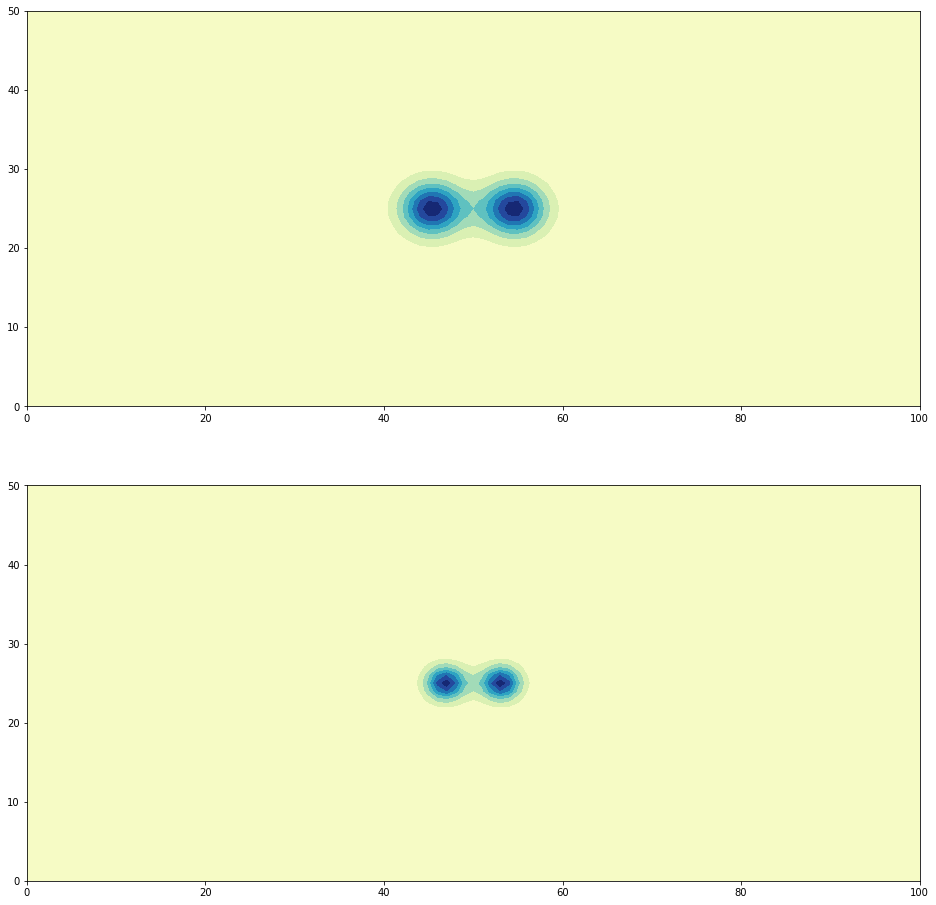

In [128]:
print("For p = %f, energy = %f"%(p, I2_p14))

maxima = find_maxima(rho2_p14)
print("dist = ", maxima[1][1] - maxima[1][0])

plt.figure(figsize=(16,16))
plt.subplot(211)
plt.contourf(rho2_p13, cmap = 'YlGnBu')
plt.subplot(212)
plt.contourf(rho2_p14, cmap = 'YlGnBu')


# We increase p again p = 1.5

In [138]:
p = 1.5
s = (2-p)**2
rho2_p15, I2_p15 = find_best_gamma(rho0, nelec, p, eps, scale = s, tol=1e-7, Niter=30)

Find best gamma with the following parameters:
nelec =  2
p =  1.5
Lx, Ly, eps, scale =  101 51 0.3 0.25
tol, Niter =  1e-07 30

Iteration  0
	Energy =  -0.02575347017266529
	kinetic =  0.012825011275780718 potential =  -0.03857848144844601
	Viriel =  -0.006464229448442285

Iteration  1
	Energy =  -0.029285569444708347
	kinetic =  0.018553190182964623 potential =  -0.04783875962767297
	Viriel =  -0.005366189630871862

Iteration  2
	Energy =  -0.031177627584137217
	kinetic =  0.023202167322157498 potential =  -0.054379794906294715
	Viriel =  -0.00398773013098986

Iteration  3
	Energy =  -0.032027943448356876
	kinetic =  0.026492531365354823 potential =  -0.0585204748137117
	Viriel =  -0.0027677060415010266

Iteration  4
	Energy =  -0.03241156523391857
	kinetic =  0.028809089872780736 potential =  -0.0612206551066993
	Viriel =  -0.0018012376805689144

Iteration  5
	Energy =  -0.032582463264748125
	kinetic =  0.030400363609964794 potential =  -0.06298282687471292
	Viriel =  -0.00109104982

For p = 1.500000, energy = -0.103115
dist =  6


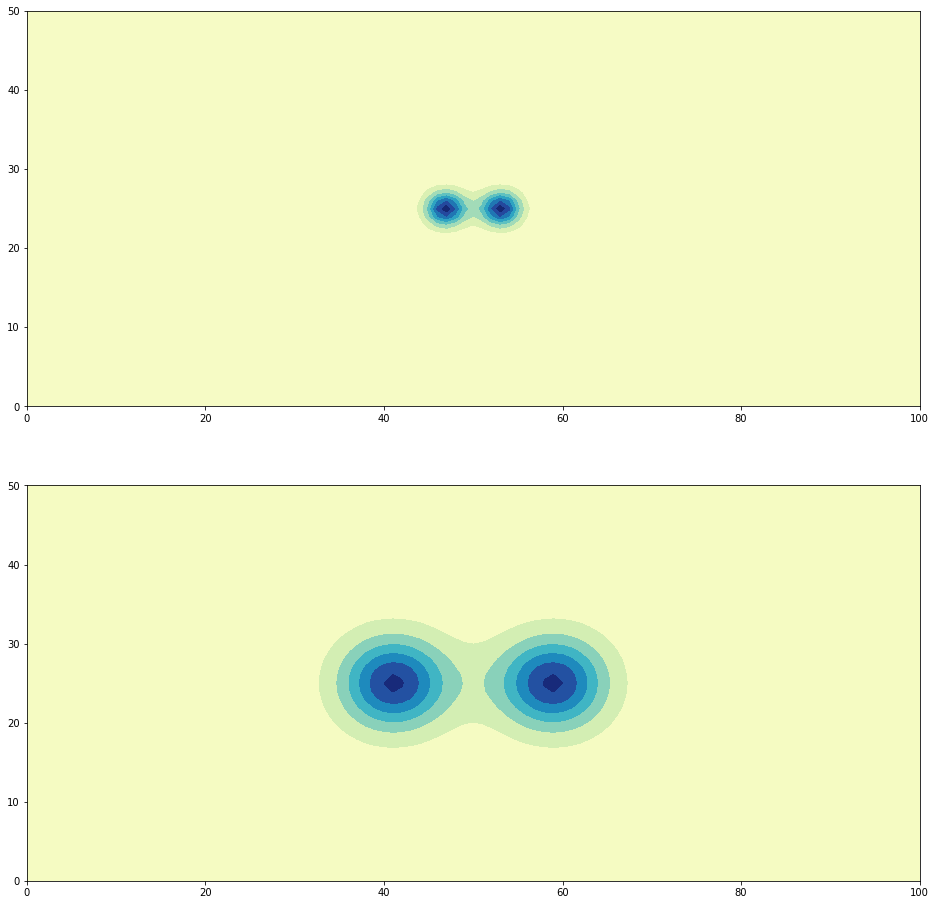

In [139]:
print("For p = %f, energy = %f"%(p, I2_p14))

maxima = find_maxima(rho2_p14)
print("dist = ", maxima[1][1] - maxima[1][0])

plt.figure(figsize=(16,16))
plt.subplot(211)
plt.contourf(rho2_p14, cmap = 'YlGnBu')
plt.subplot(212)
plt.contourf(rho2_p15, cmap = 'YlGnBu')

# We increase p again

In [135]:
p = 1.6
s = (2-p)**2
rho2_p16, I2_p16 = find_best_gamma(rho2_p15, nelec, p, eps, scale = s, tol=1e-7, Niter=30)

Find best gamma with the following parameters:
nelec =  2
p =  1.6
Lx, Ly, eps, scale =  101 51 0.3 0.15999999999999992
tol, Niter =  1e-07 30

Iteration  0
	Energy =  0.01379511120145653
	kinetic =  0.06253936364325968 potential =  -0.04874425244180315
	Viriel =  0.03329281217817778

Iteration  1
	Energy =  -0.0015116455509344671
	kinetic =  0.030337073287357682 potential =  -0.03184871883829215
	Viriel =  0.01122784198438239

Iteration  2
	Energy =  -0.0046352723743434375
	kinetic =  0.021110162752236348 potential =  -0.025745435126579785
	Viriel =  0.005662901676288475

Iteration  3
	Energy =  -0.005633604211907135
	kinetic =  0.017235785579018566 potential =  -0.0228693897909257
	Viriel =  0.003514151704463144

Iteration  4
	Energy =  -0.00604848462773226
	kinetic =  0.01527635619695932 potential =  -0.02132484082469158
	Viriel =  0.0024814517021443695

Iteration  5
	Energy =  -0.006252653176228362
	kinetic =  0.014171047318826496 potential =  -0.020423700495054858
	Viriel =  0.001

For p = 1.600000, energy = -0.006608
dist =  0


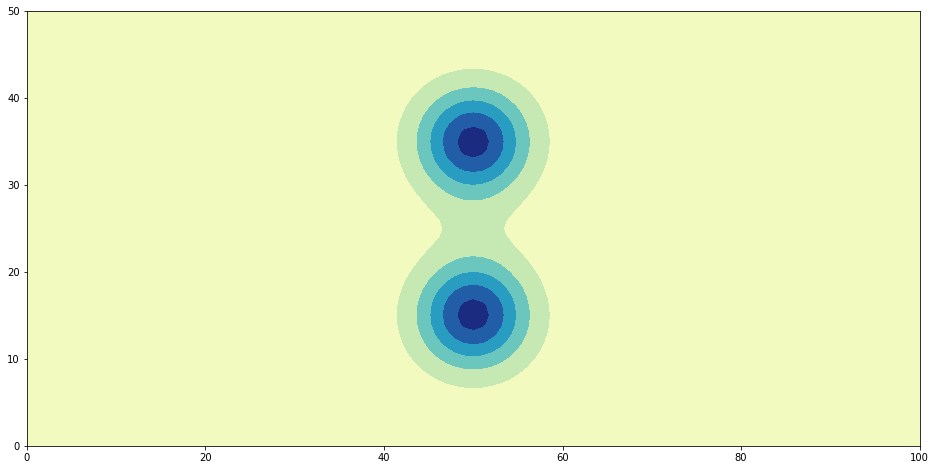

In [136]:
print("For p = %f, energy = %f"%(p, I2_p16))

maxima = find_maxima(rho2_p16)
print("dist = ", maxima[1][1] - maxima[1][0])

plt.figure(figsize=(16,8))
plt.contourf(rho2_p16, cmap = 'YlGnBu')

# We increase p again p = 1.7

In [1]:
p = 1.7
s = (2-p)**2
rho2_p17, I2_p17 = find_best_gamma(rho2_p16, nelec, p, eps, scale = s, tol=1e-7, Niter=30)

NameError: name 'find_best_gamma' is not defined

For p = 1.700000, energy = -0.000602
dist =  20


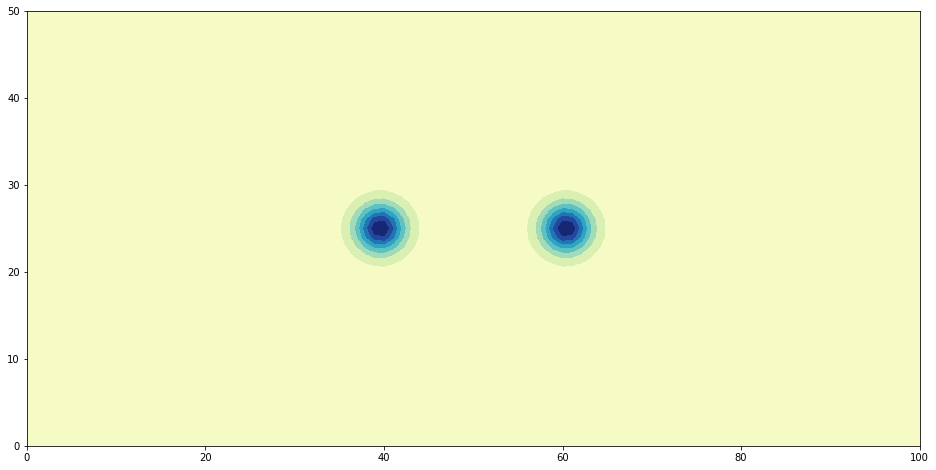

In [116]:
print("For p = %f, energy = %f"%(p, I2_p17))

maxima = find_maxima(rho2_p17)
print("dist = ", maxima[1][1] - maxima[1][0])

plt.figure(figsize=(16,8))
plt.contourf(rho2_p17, cmap = 'YlGnBu')